In [2]:
# Mount code
from google.colab import drive
drive.mount('/content/gdrive')

from keras.models import load_model
import keras.metrics
import keras.preprocessing.image as image
import numpy as np

def top_3_accuracy(y_true, y_pred):
    return keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=3)


def top_2_accuracy(y_true, y_pred):
    return keras.metrics.top_k_categorical_accuracy(y_true, y_pred, k=2)


keras.metrics.top_3_accuracy = top_3_accuracy
keras.metrics.top_2_accuracy = top_2_accuracy

model = load_model('/content/gdrive/My Drive/hospital-ml/20181228-134756-model.h5') # change to your model.h5 file path

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Using TensorFlow backend.


In [3]:
import keras
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator

generator = ImageDataGenerator(
    preprocessing_function=
    keras.applications.mobilenet.preprocess_input,
    rotation_range=180,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

generator_with_aug = generator.flow_from_directory(
    '/content/gdrive/My Drive/hospital-ml/mel/',
    target_size=(224, 224),
    batch_size=1) #There is only 1 picture in the directory


Found 1 images belonging to 1 classes.


In [4]:
activations = model.predict_generator(generator_with_aug, steps=20)
activations

array([[5.85001952e-04, 4.58340719e-06, 6.83618360e-04, 8.45991053e-06,
        9.98420954e-01, 2.97334074e-04, 7.07709873e-08],
       [3.81370319e-06, 2.29354384e-07, 5.09095444e-05, 1.68388382e-07,
        9.99944448e-01, 5.28172950e-10, 4.93253424e-07],
       [6.45672381e-02, 1.14883051e-05, 6.10173354e-03, 1.39222630e-05,
        9.29301977e-01, 1.00572277e-06, 2.62205003e-06],
       [1.62530206e-02, 7.17445482e-06, 2.04563512e-05, 5.25167181e-08,
        9.83713984e-01, 5.26172335e-06, 1.26725439e-08],
       [1.03880810e-02, 1.58211492e-06, 5.15543914e-04, 4.11748658e-07,
        9.89092231e-01, 6.06664798e-08, 1.99424971e-06],
       [6.11578599e-02, 2.62291078e-03, 1.51321255e-02, 1.91582629e-04,
        9.20782745e-01, 6.66442645e-07, 1.12042944e-04],
       [2.77705491e-02, 9.97927873e-06, 5.42175584e-03, 1.36763583e-05,
        9.66783702e-01, 2.04482049e-07, 6.32981170e-08],
       [1.05536086e-02, 6.20140690e-06, 4.89216822e-04, 4.03994335e-07,
        9.88949060e-01, 8

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


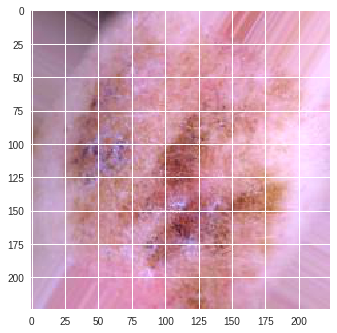

(1, 224, 224, 3)


In [91]:
from keras.models import Model
import matplotlib.pyplot as plt

img_path = '/content/gdrive/My Drive/hospital-ml/mel/tmp/_0_1508716.jpg'
img = image.load_img(img_path) #, target_size=(224, 224))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 224.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)


In [0]:


layer_outputs = [layer.output for layer in model.layers[1:]]
activation_model = Model(inputs=model.input, outputs=layer_outputs)

activations = activation_model.predict(img_tensor)

In [94]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 225, 225, 3)


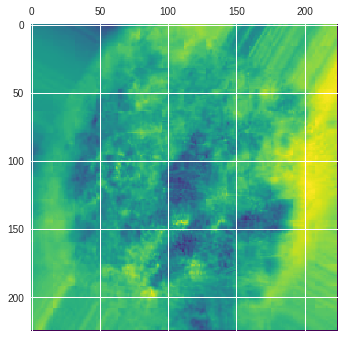

In [97]:
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')

In [58]:
activations[0]

array([[[[-1.0079051, -1.0079051, -1.0079051],
         [-1.0079051, -1.0079051, -1.0079051],
         [-1.0079051, -1.0079051, -1.0079051],
         ...,
         [-1.0079051, -1.0079051, -1.0079051],
         [-1.0079051, -1.0079051, -1.0079051],
         [ 0.       ,  0.       ,  0.       ]],

        [[-1.0079051, -1.0079051, -1.0079051],
         [-1.0079051, -1.0079051, -1.0079051],
         [-1.0079051, -1.0079051, -1.0079051],
         ...,
         [-1.0079051, -1.0079051, -1.0079051],
         [-1.0079051, -1.0079051, -1.0079051],
         [ 0.       ,  0.       ,  0.       ]],

        [[-1.0079051, -1.0079051, -1.0079051],
         [-1.0079051, -1.0079051, -1.0079051],
         [-1.0079051, -1.0079051, -1.0079051],
         ...,
         [-1.0079051, -1.0079051, -1.0079051],
         [-1.0079051, -1.0079051, -1.0079051],
         [ 0.       ,  0.       ,  0.       ]],

        ...,

        [[-1.0079051, -1.0079051, -1.0079051],
         [-1.0079051, -1.0079051, -1.0079051]

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

In [59]:
layer_names = []

for layer in model.layers[1:]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot 

images_per_row = 16


for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    size = layer_activation.shape[1] #The feature map has shape (1, size, size, n_features).

    n_cols = n_features // images_per_row # Tiles the activation channels in this matrix
    
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
              channel_image = layer_activation[0,
                                               :, :,
                                               col * images_per_row + row]
              channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
              channel_image /= channel_image.std()
              channel_image *= 64
              channel_image += 128
              channel_image = np.clip(channel_image, 0, 255).astype('uint8')
              display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
             
            
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

Output hidden; open in https://colab.research.google.com to view.

In [0]:
from sklearn.metrics import confusion_matrix
Y_prediction = model.predict(img_tensor)

# Convert predictions classes to one hot vectors 
Y_pred_classes = np.argmax(Y_prediction,axis = 1) 
# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_valid,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 